##Passo 1: Importar biblioteca

Par Inc., é um importante fabricante de equipamentos de golfe. A administração acredita que a participação de mercado da Par pode ser aumentada com a introdução de uma bola de golfe resistente a cortes e mais duradoura. Portanto, o grupo de pesquisa da Par tem investigado um novo revestimento de bola de golfe projetado para resistir a cortes e fornecer uma bola mais durável. Os testes com o revestimento têm se mostrado promissores. Um dos pesquisadores expressou preocupação com o efeito do novo revestimento nas distâncias percorridas. A Par gostaria que a nova bola resistente a cortes oferecesse distâncias de condução comparáveis às da bola de golfe do modelo atual. Para comparar as distâncias percorridas pelas duas bolas, 40 bolas dos modelos novo e atual foram submetidas a testes de distância. O teste foi realizado com uma batedeira mecânica de modo que qualquer diferença entre as distâncias médias dos dois modelos pudesse ser atribuída a uma diferença no projeto.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats

In [ ]:
golf = pd.read_csv("/content/drive/MyDrive/Golf.csv")

In [ ]:
golf.info()

##Passo 2: Inicial
Explorar o conjunto de dados.

In [ ]:
golf.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


<Axes: >

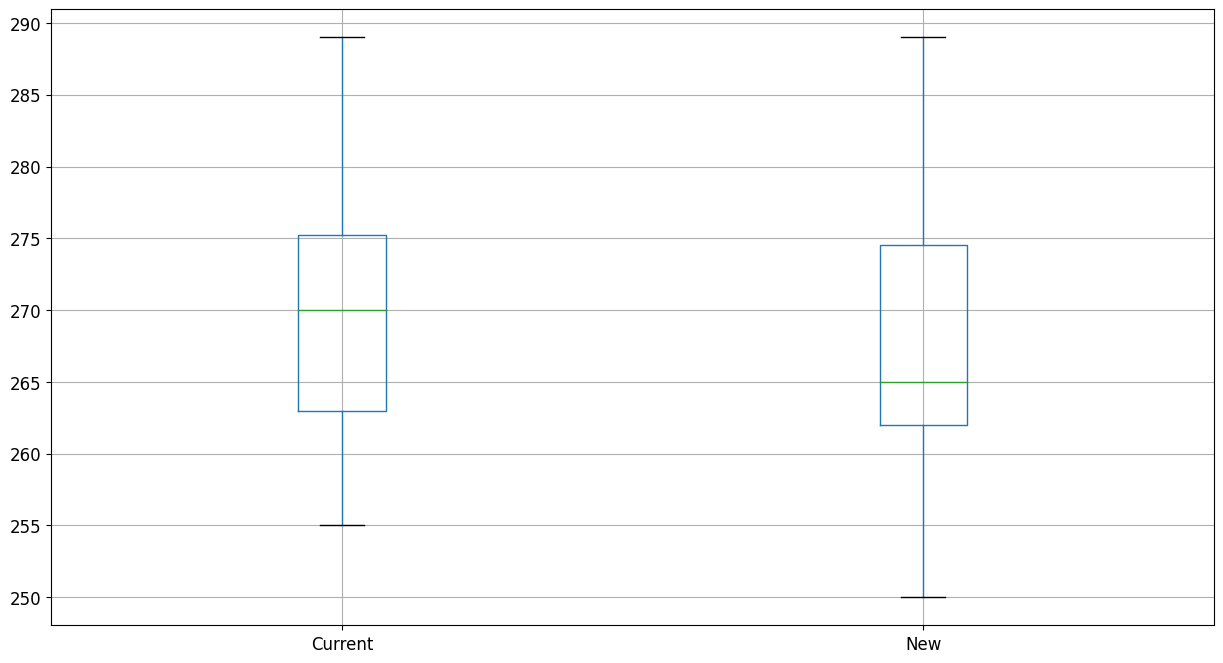

In [ ]:
golf.boxplot(fontsize='large',figsize=(15,8))

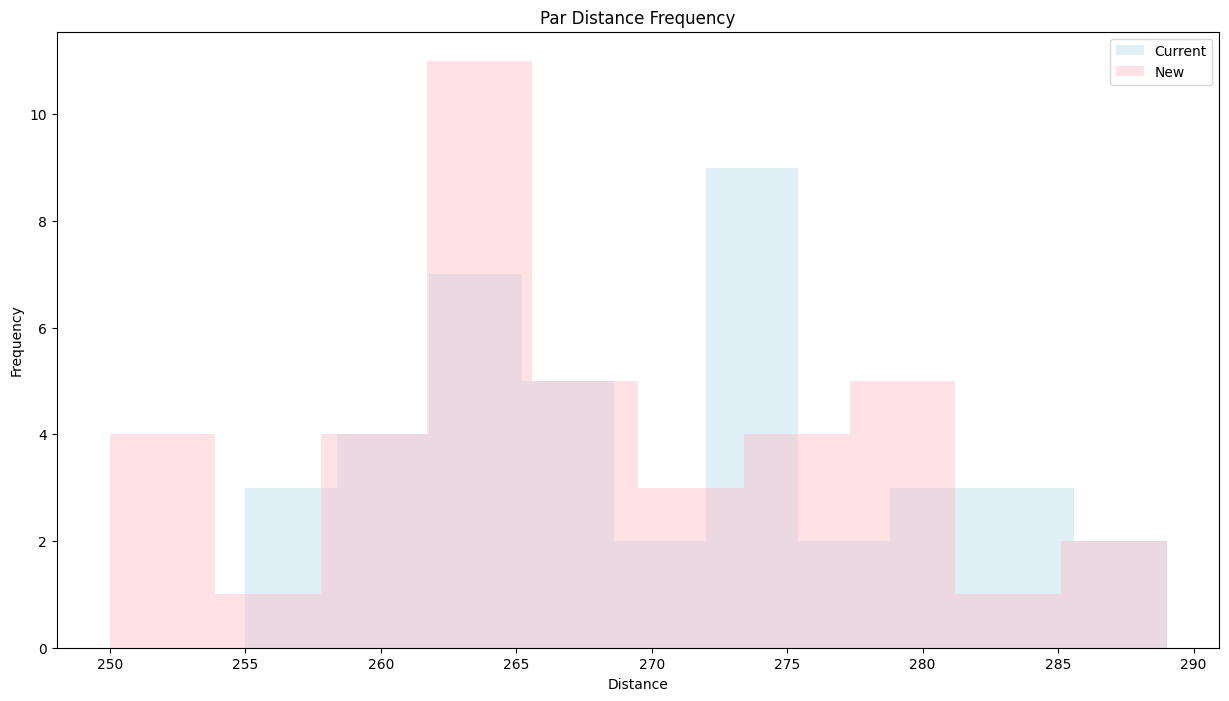

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(golf['Current'], color = 'lightblue', alpha = 0.4)
ax.hist(golf['New'], color = 'lightpink', alpha = 0.4)
ax.legend(['Current','New'])
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')
ax.set_title('Par Distance Frequency')
plt.show()

Com base em uma análise inicial, as 40 amostras de distância entre as bolas Atual e Nova apresentam medidas semelhantes. Ambas têm valores médios, padrões e mínimos parecidos. Elas também possuem o mesmo valor máximo. No entanto, apesar de não ser possível extrair percepções concretas das distribuições, parece que a nova bola fabricada atinge distâncias maiores com maior frequência, o que é respaldado pelo fato de ter uma média mais alta.

#Hipótese Nula:
Tanto as bolas atuais quanto as novas atingem o mesmo padrão de desempenho em relação às distâncias percorridas.

##Hipótese Alternativa
O desempenho da distância de condução da bola nova é diferente (melhor ou pior) em comparação com a bola atual.

##Passo 3: Teste de Permutação
Considerando que as duas bolas têm o mesmo padrão de desempenho, qual é a chance de que a bola nova tenha alcançado distâncias de condução maiores por pura coincidência?

In [ ]:
mean_diff_estimate = round(golf['Current'].mean() - golf['New'].mean() , 3)
mean_diff_estimate

2.775

O valor da variável "mean_diff_estimate" é a estimativa da diferença média entre os valores das colunas "Current" e "New" do dataframe "golf".

A diferença das médias de distância de condução é de 2,775, o que é a favor da bola atual.

##Diferença de permutação

In [ ]:
distances = golf.to_numpy().flatten()
mean_diff_samples = []

for i in range(1000):
    perm_distances = np.random.permutation(distances)
    current_sample = perm_distances[:40]
    new_sample = perm_distances[40:]
    mean_diff_samples.append(round(current_sample.mean() - new_sample.mean() , 3))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(mean_diff_samples, color = 'lightblue')
ax.axvline(mean_diff_estimate)
ax.set_xlabel('Difference of Means')
ax.set_ylabel('Frequency')
ax.set_title('Difference of Means Distribution')
plt.show()

In [ ]:
mean_diff_samples = np.array(mean_diff_samples)
p = len(mean_diff_samples[mean_diff_samples >= mean_diff_estimate])/len(mean_diff_samples)
p

0.092

Geralmente, a diferença média entre permutações aleatórias é maior do que a diferença média observada. Isso ocorre em cerca de 9,2% das vezes, de acordo com o valor-p. Portanto, é improvável que a bola atual tenha tido uma chance maior de alcançar uma distância de condução mais longa em comparação com a nova bola.






##Passo 4: t-Test


Apesar de a permutação ter sido considerada suficiente para chegar a uma conclusão, precisamos adotar uma abordagem diferente utilizando a distribuição t. Para aplicarmos o teste t, é necessário assegurar que ambas as amostras atendam às 4 suposições.

Suposição 1: Independência.

A distância de condução para ambas as bolas não dependia uma da outra. Em outras palavras, Cada bola tinha seu próprio desempenho independente da outra em termos de distância alcançada.


Suposição 2: Normalidade.

Ambas as amostras precisam ser normalmente distribuídas. Para verificar essa suposição, podemos usar o teste de shapiro-wilkes para verificar se essa amostra de dados segue uma distribuição normal.

In [ ]:
curr_w, curr_p = stats.shapiro(golf['Current'])
new_w, new_p = stats.shapiro(golf['New'])
print(f'Current ball sample\nw value: {curr_w}  p value: {curr_p}\n')
print(f'New ball sample\nw value: {new_w}  p value: {new_p}')

Current ball sample
w value: 0.9707044363021851  p value: 0.37877947092056274

New ball sample
w value: 0.9678263664245605  p value: 0.3064655363559723


##Gráfico de dispersão

<ipython-input-37-c6c5c6b876f0>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,1)


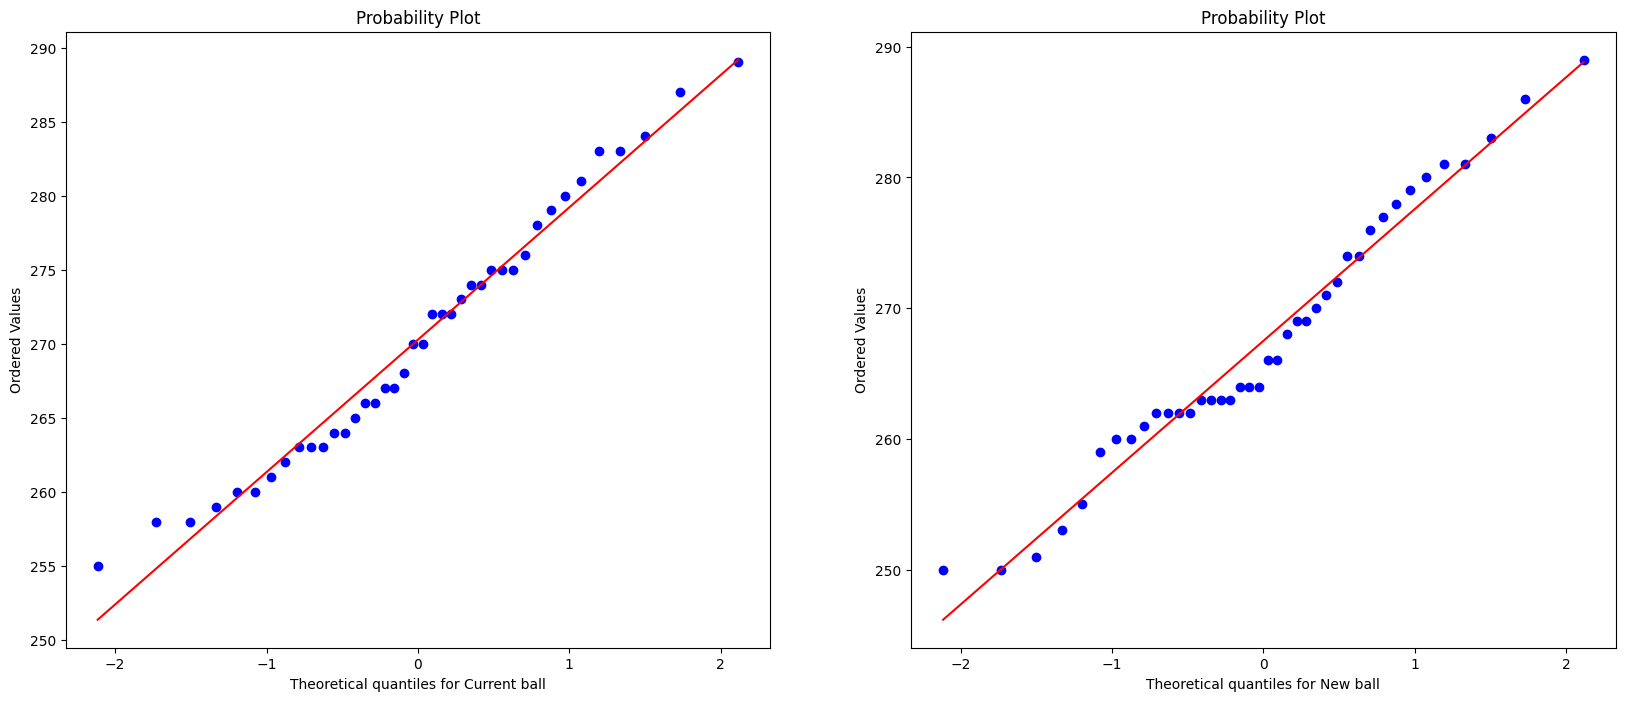

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
stats.probplot(golf['Current'], plot=ax1)
ax1.set_xlabel('Theoretical quantiles for Current ball')

ax2 = plt.subplot(1,2,2)
stats.probplot(golf['New'], plot=ax2)
ax2.set_xlabel('Theoretical quantiles for New ball')
plt.show()

Uma vez que ambas as amostras pontuaram altos valores de w e atingiram valores de p acima de 0,05, pode-se concluir que ambas as amostras são normalmente distribuídas.

Suposição 3: Homogeneidade de Variâncias

para cumprir essa suposição estatística, é necessário garantir que a diferença entre as variações das amostras seja moderada, com a variação mais alta não excedendo 4 vezes a variação mais baixa.

In [ ]:
ratio = golf['New'].var()/golf['Current'].var()
ratio

1.2784578184221755

Como a proporção é menor que 4, as variâncias podem ser consideradas iguais.


Suposição 4: Amostragem Aleatória

Ambas as amostras foram obtidas usando amostragem aleatória.


##T Test

In [ ]:
stats.ttest_ind(golf['Current'], golf['New'])

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

O valor de estatistica é representado pelo número: 1.3283615935245678. Esse valor indica a magnitude da diferença entre as médias das duas amostras. Quanto maior o valor da estatística, maior a diferença entre as médias.

O valor-p é representado pelo número: 0.18793228491854663. Esse valor indica a probabilidade de obter uma diferença tão grande ou maior entre as médias das amostras, assumindo que não haja diferença real entre as populações subjacentes. Quanto menor o valor-p, maior a evidência estatística contra a hipótese nula de que não há diferença real entre as médias.

No caso específico desse resultado, a estatística é positiva (1.3283615935245678), o que indica que há uma diferença positiva entre as médias das amostras. No entanto, o valor-p é 0.18793228491854663, o que sugere que essa diferença pode ter ocorrido por acaso com uma probabilidade de aproximadamente 18.8%.


Considerando que o valor t é baixo e o valor p é > 0,05, então podemos aceitar a hipótese nula.

##Conclusão:
A Par Inc deve continuar a produção da nova bola, uma vez que o novo revestimento não afetará o desempenho da distância percorrida de forma alguma.